### **Otimização do Consumo de Energia e Alocação de Recursos por Meio da Previsão de Temperatura no Sudeste do Brasil**  

#### **Contexto**  
O Sudeste do Brasil tem variações climáticas influenciadas pela proximidade do mar, altitude e localização geográfica. Essas mudanças impactam diretamente o consumo de energia, especialmente em setores como resfriamento residencial, processos industriais e agricultura. A previsão precisa da temperatura ajuda empresas de energia e grandes consumidores a otimizar o uso de eletricidade, reduzindo custos e melhorando a eficiência.  

#### **Descrição do Conjunto de Dados**  
O dataset contém registros diários das temperaturas máxima e mínima no Sudeste do Brasil, coletados pelo INMET de **1º de janeiro de 2000 a 31 de março de 2024**. As colunas incluem:  
- **station_id**: Código da estação meteorológica  
- **latitude e longitude**: Localização da estação  
- **altitude**: Altitude em metros  
- **measure_date**: Data da medição  
- **max_temperature e min_temperature**: Temperaturas máxima e mínima do dia  

Esse conjunto de dados permite analisar tendências, prever temperaturas futuras e estudar o impacto da geografia na variação da temperatura.  

#### **Problema**  
Empresas de energia e grandes consumidores buscam otimizar o consumo e a alocação de recursos usando dados históricos de temperatura. O desafio é criar um **modelo de previsão de temperatura confiável** que considere fatores geográficos para melhorar a distribuição e reduzir desperdícios.  

#### **Objetivos**  
1. **Análise de Dados** – Identificar tendências, padrões sazonais e anomalias.  
2. **Modelagem Preditiva** – Desenvolver modelos de machine learning para prever temperaturas diárias.  
3. **Previsão da Demanda Energética** – Relacionar a previsão de temperatura ao consumo de energia.  
4. **Alocação de Recursos** – Melhorar a distribuição e armazenamento de energia com base nas previsões.  
5. **Sustentabilidade** – Criar estratégias para eficiência energética e redução de impacto ambiental.  

#### **Impacto Esperado**  
- **Redução de Custos**: Melhor planejamento energético para evitar desperdícios.  
- **Maior Eficiência**: Otimização da rede elétrica e balanceamento da carga.  
- **Sustentabilidade**: Uso mais consciente da energia e redução da pegada de carbono.  
- **Gerenciamento de Riscos**: Antecipação de eventos climáticos extremos.  
- **Melhor Tomada de Decisão**: Uso de previsões confiáveis para planejamento estratégico.  

#### **Desafios**  
- **Qualidade dos Dados**: Garantir precisão e consistência das medições.  
- **Precisão do Modelo**: Lidar com fatores geográficos complexos.  
- **Integração com Sistemas de Energia**: Incorporar previsões às operações.  
- **Escalabilidade**: Garantir que o modelo funcione com grandes volumes de dados.  
- **Colaboração**: Envolver fornecedores de energia e consumidores no uso dos insights.  

#### **Próximos Passos**  
1. **Preparação dos Dados** – Limpeza e tratamento do dataset.  
2. **Análise Exploratória** – Descobrir padrões climáticos e fatores influentes.  
3. **Modelagem** – Implementar e testar modelos de previsão.  
4. **Correlação com Consumo de Energia** – Relacionar temperatura e demanda energética.  
5. **Implementação** – Criar ferramentas para apoiar decisões estratégicas.  
6. **Melhoria Contínua** – Atualizar modelos com novos dados para maior precisão.  

In [4]:
# Installing packages
!pip install watermark
!pip install pydotplus
!pip install pmdarima
!pip install prophet
!pip install neuralprophet

In [11]:
import pandas as pd

# Nome do arquivo CSV
arquivo_csv = "daily_min_max_temp_br_se.csv"

# Carregar o dataset
df = pd.read_csv(arquivo_csv)

# Exibir as primeiras linhas do dataset
df.head()

C:\Users\luizj\AppData\Local\Temp\ipykernel_11336\420608114.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo_csv)


,station_name,station_id,latitude,longitude,altitude,measure_date,max_temperature,min_temperature
0,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-01,31.4,21.2
1,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-02,26.8,21.0
2,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-03,NaN,19.9
3,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-04,NaN,21.2
4,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-05,33.4,20.7


In [15]:
!pip install datasets

In [21]:
!pip install folium

In [26]:
# Instalação de todas as bibliotecas necessárias
!pip install watermark pydotplus pmdarima prophet neuralprophet datasets folium geopandas

In [28]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools
from datasets import Dataset

# Library for file manipulation
import pandas
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Importing library maps display function
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from IPython.display import display

# Importing library test ad fuller
from statsmodels.tsa.stattools import adfuller

# Importing the necessary libraries for time series
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing plot waste
from statsmodels.graphics.gofplots import qqplot

# Importing evaluation metrics library
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.12.7
Author: Library versions

matplotlib : 3.9.2
IPython    : 8.27.0
pmdarima   : 2.0.4
json       : 2.0.9
sklearn    : 1.5.1
folium     : 0.19.5
watermark  : 2.5.0
platform   : 1.0.8
geopandas  : 1.0.1
numpy      : 1.26.4
pandas     : 2.2.2
statsmodels: 0.14.2
datasets   : 3.3.2
seaborn    : 0.13.2
re         : 2.2.1
plotly     : 5.24.1



### **Part 2 - Database**

In [36]:
# Database
# Ajuste o caminho para onde o arquivo está armazenado no seu computador
df = pd.read_csv("daily_min_max_temp_br_se.csv")
# Display the first few rows
df.head()

,station_name,station_id,latitude,longitude,altitude,measure_date,max_temperature,min_temperature
0,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-01,31.4,21.2
1,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-02,26.8,21.0
2,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-03,NaN,19.9
3,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-04,NaN,21.2
4,ALTO DA BOA VISTA,83007,-22.965833,-43.279167,347.1,2000-01-05,33.4,20.7


In [40]:
# Exibe as últimas 5 linhas do DataFrame
df.tail()

,station_name,station_id,latitude,longitude,altitude,measure_date,max_temperature,min_temperature
1619294,BELO HORIZONTE - CERCADINHO,F501,-19.98,-43.958611,1199.55,2024-03-27,27.0,17.2
1619295,BELO HORIZONTE - CERCADINHO,F501,-19.98,-43.958611,1199.55,2024-03-28,26.1,18.4
1619296,BELO HORIZONTE - CERCADINHO,F501,-19.98,-43.958611,1199.55,2024-03-29,29.5,18.1
1619297,BELO HORIZONTE - CERCADINHO,F501,-19.98,-43.958611,1199.55,2024-03-30,29.3,19.1
1619298,BELO HORIZONTE - CERCADINHO,F501,-19.98,-43.958611,1199.55,2024-03-31,29.4,18.7


In [42]:
# Retorna uma tupla com o número de linhas e colunas do DataFrame. O primeiro valor é o número de linhas e o segundo é o número de colunas.
df.shape

(1619299, 8)

In [44]:
# Exibe um resumo das informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619299 entries, 0 to 1619298
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   station_name     1619299 non-null  object 
 1   station_id       1619299 non-null  object 
 2   latitude         1619299 non-null  float64
 3   longitude        1619299 non-null  float64
 4   altitude         1619299 non-null  float64
 5   measure_date     1619299 non-null  object 
 6   max_temperature  1395282 non-null  float64
 7   min_temperature  1399893 non-null  float64
dtypes: float64(5), object(3)
memory usage: 98.8+ MB


In [46]:
# Retorna uma série com os tipos de dados de cada coluna do DataFrame
df.dtypes

station_name        object
station_id          object
latitude           float64
longitude          float64
altitude           float64
measure_date        object
max_temperature    float64
min_temperature    float64
dtype: object

### **Parte 3 - Data Cleaning and Preprocessing**

1 -- Conversão de Datas e Verificação de Valores Ausentes

In [50]:
# Convert 'measure_date' to datetime
df['measure_date'] = pd.to_datetime(df['measure_date'], format='%Y-%m-%d')

# Check for missing values
print(df.isnull().sum())

station_name            0
station_id              0
latitude                0
longitude               0
altitude                0
measure_date            0
max_temperature    224017
min_temperature    219406
dtype: int64


2 -- Tratamento de Valores Ausentes e Verificação de Tipos de Dados

In [53]:
# Handle missing values if any
# For simplicity, we'll drop rows with missing temperature values
df = df.dropna(subset=['max_temperature', 'min_temperature'])

# Verify data types
print(df.dtypes)

station_name               object
station_id                 object
latitude                  float64
longitude                 float64
altitude                  float64
measure_date       datetime64[ns]
max_temperature           float64
min_temperature           float64
dtype: object


3 -- Criação de Colunas Adicionais

In [61]:
# Add additional columns if necessary
df['year'] = df['measure_date'].dt.year
df['month'] = df['measure_date'].dt.month
df['day'] = df['measure_date'].dt.day
df['day_of_year'] = df['measure_date'].dt.dayofyear

4 -- Preenchimento de Valores Ausentes com Forward Fill


In [66]:
# Example: Forward fill for temperature values
df['max_temperature'] = df['max_temperature'].fillna(method='ffill')
df['min_temperature'] = df['min_temperature'].fillna(method='ffill')

### **Part 4 - Exploratory Data Analysis(EDA)**

1: Estatísticas Descritivas das Temperaturas

In [70]:
# Summary statistics for temperature
df[['max_temperature', 'min_temperature']].describe().T

,count,mean,std,min,25%,50%,75%,max
max_temperature,1371816.0,28.713199,4.195494,3.0,26.1,29.0,31.6,44.8
min_temperature,1371816.0,17.431315,3.989045,-9.9,15.1,18.1,20.3,32.0


2: Estatísticas Descritivas por Ano

In [75]:
# Summary statistics by year
yearly_stats = df.groupby('year')[['max_temperature', 'min_temperature']].agg(['mean', 'min', 'max'])
yearly_stats.head()

max_temperature             min_temperature           
                mean   min   max            mean  min   max
year                                                       
2000       28.599560   7.6  40.5       17.194427 -4.5  31.0
2001       29.140688  11.8  40.5       17.481917  0.0  32.0
2002       29.391501  12.0  41.2       17.885710 -2.7  28.5
2003       29.095345  11.1  40.8       17.528879 -0.7  30.6
2004       28.033663  12.7  40.5       17.202430 -2.7  27.1

3: Distribuição das Temperaturas Máxima e Mínima

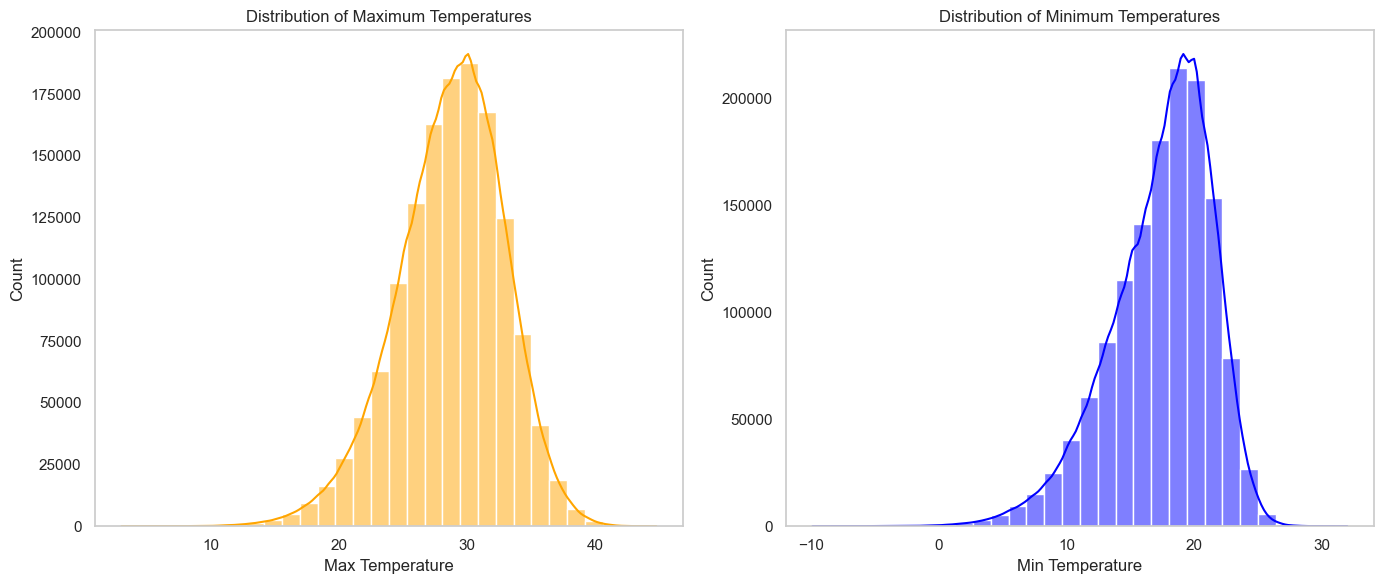

In [79]:
# Distribution of Maximum and Minimum Temperatures
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Plot for maximum temperature
sns.histplot(df['max_temperature'], bins=30, kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Maximum Temperatures')
ax[0].set_xlabel('Max Temperature')
ax[0].set_ylabel('Count')
ax[0].grid(False)

# Plot for minimum temperature
sns.histplot(df['min_temperature'], bins=30, kde=True, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Minimum Temperatures')
ax[1].set_xlabel('Min Temperature')
ax[1].set_ylabel('Count')
ax[1].grid(False)

plt.tight_layout()
plt.show()

4: Correlação entre Temperaturas Máxima e Mínima

Correlation between Max and Min Temperatures: 0.53


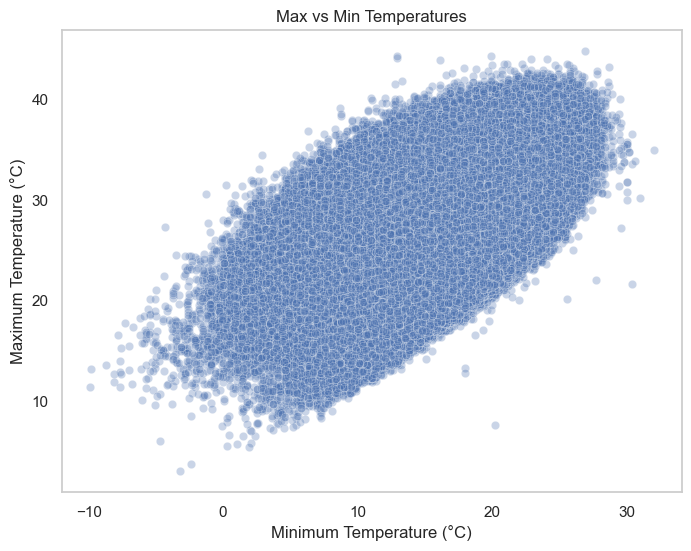

In [82]:
# Correlation between max and min temperatures
corr = df['max_temperature'].corr(df['min_temperature'])
print(f"Correlation between Max and Min Temperatures: {corr:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='min_temperature', y='max_temperature', data=df, alpha=0.3)
plt.title('Max vs Min Temperatures')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(False)
plt.show()

5: Temperaturas Médias ao Longo dos Anos

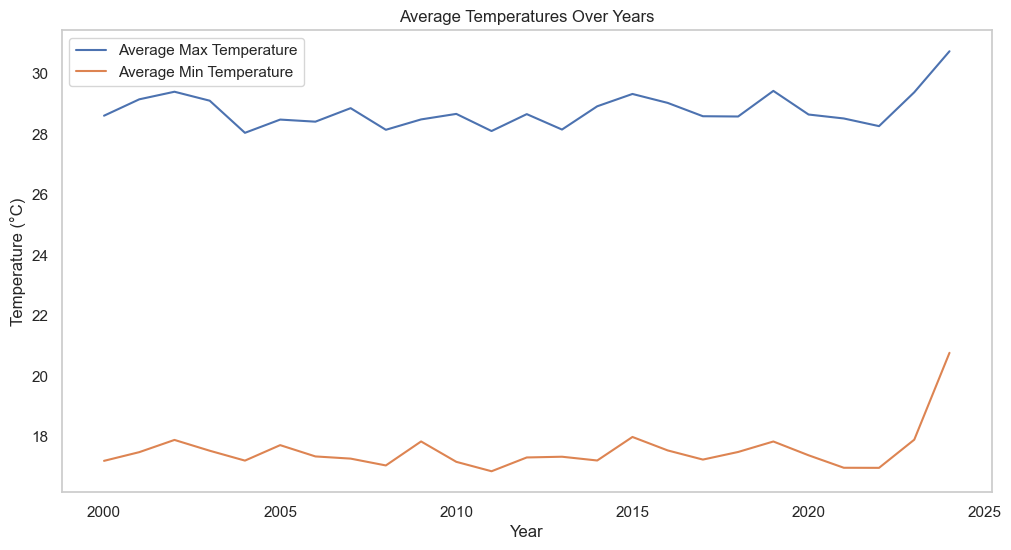

In [85]:
# Average maximum temperature per year
avg_max_temp_year = df.groupby('year')['max_temperature'].mean()

# Average minimum temperature per year
avg_min_temp_year = df.groupby('year')['min_temperature'].mean()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(avg_max_temp_year.index, avg_max_temp_year.values, label='Average Max Temperature')
plt.plot(avg_min_temp_year.index, avg_min_temp_year.values, label='Average Min Temperature')
plt.title('Average Temperatures Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(False)
plt.show()

6: Tendências Sazonais (Médias Mensais)

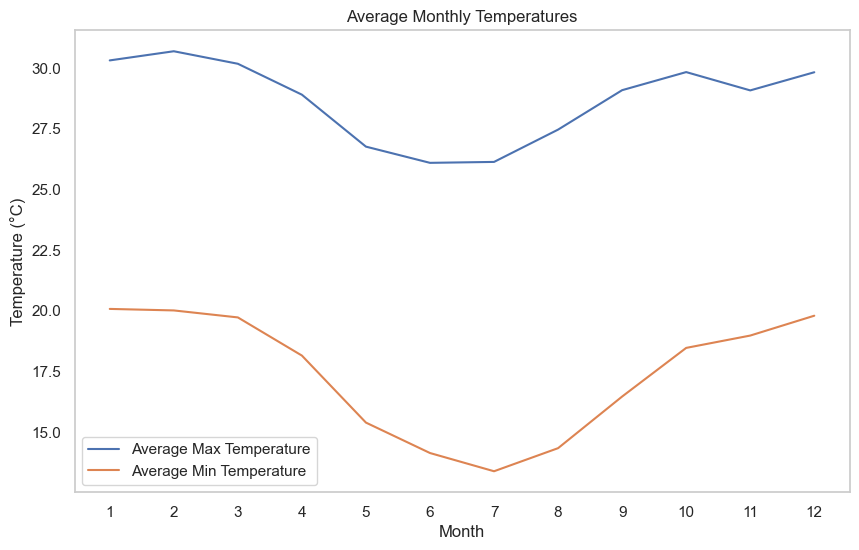

In [88]:
# Average temperature by month to identify seasonal trends
monthly_avg = df.groupby('month')[['max_temperature', 'min_temperature']].mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_avg.index, monthly_avg['max_temperature'], label='Average Max Temperature')
plt.plot(monthly_avg.index, monthly_avg['min_temperature'], label='Average Min Temperature')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(range(1,13))
plt.grid(False)
plt.show()

7: Heatmap de Temperaturas Máximas (Mês vs Ano)

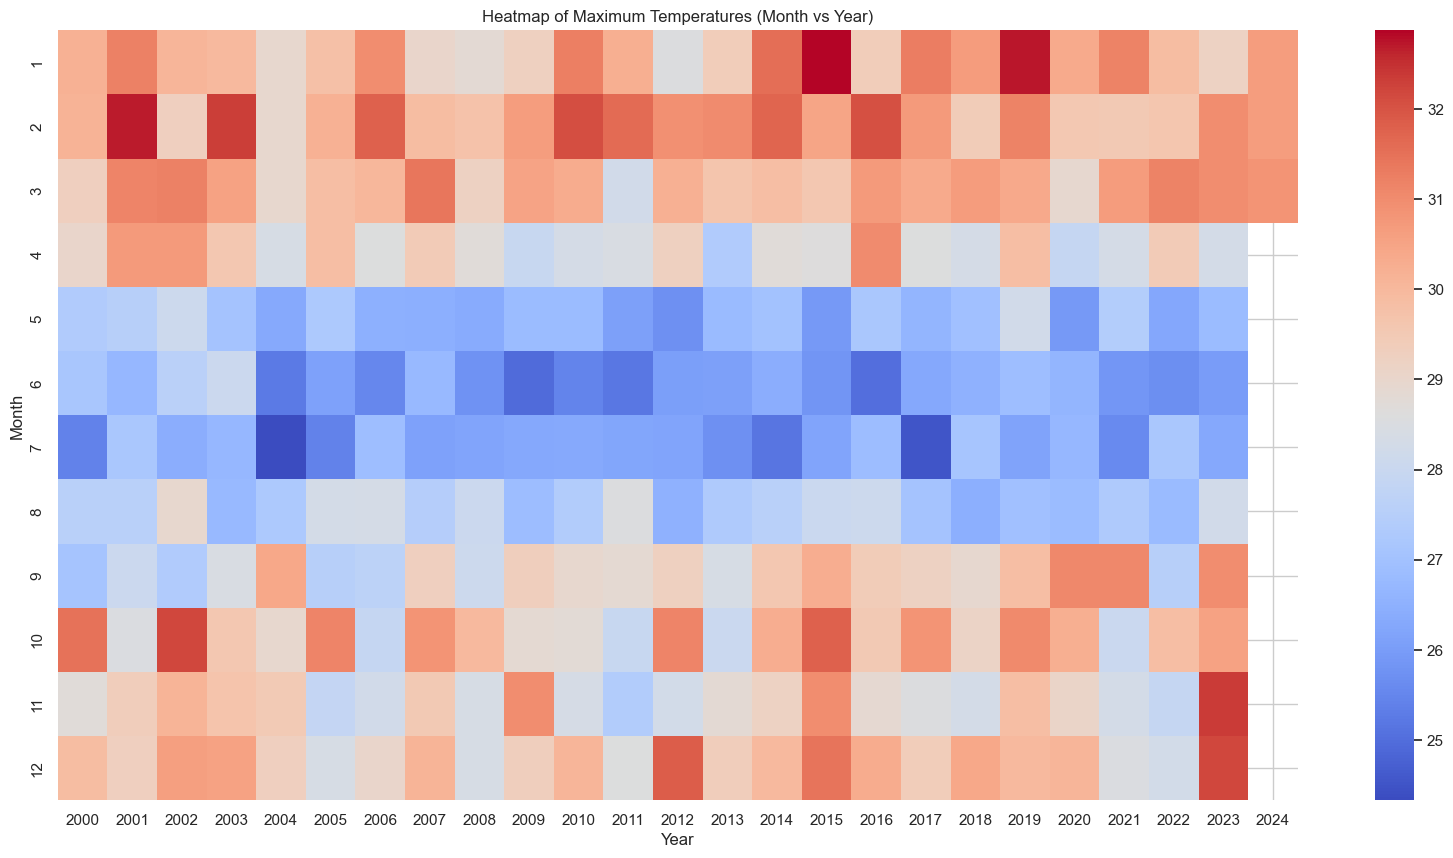

In [91]:
# Pivot table for heatmap
pivot_table = df.pivot_table(index='month', columns='year', values='max_temperature')

plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Heatmap of Maximum Temperatures (Month vs Year)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

8: Médias de Temperatura por Estação

In [94]:
# Calculate average temperatures per station
station_avg_temps = df.groupby(['station_id', 'station_name', 'latitude', 'longitude']).agg({'max_temperature': 'mean',
                                                                                             'min_temperature': 'mean'}).reset_index()

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(station_avg_temps,
                       geometry=gpd.points_from_xy(station_avg_temps.longitude, station_avg_temps.latitude))

gdf

,station_id,station_name,latitude,longitude,max_temperature,min_temperature,geometry
0,83007,ALTO DA BOA VISTA,-22.965833,-43.279167,26.862605,18.226190,POINT (-43.27917 -22.96583)
1,83013,MUNIZ FREIRE,-20.465833,-41.411944,28.307068,16.950734,POINT (-41.41194 -20.46583)
2,83015,MARIA DA FE,-22.314444,-45.373056,25.157664,11.039732,POINT (-45.37306 -22.31444)
3,83032,LAMBARI,-21.944146,-45.317739,28.496580,12.679614,POINT (-45.31774 -21.94415)
4,83034,ITARANA,-19.874230,-40.872959,30.645561,19.568461,POINT (-40.87296 -19.87423)
...,...,...,...,...,...,...,...
273,A768,TUPA,-21.927251,-50.490251,30.553960,18.589290,POINT (-50.49025 -21.92725)
274,A769,CACHOEIRA PAULISTA,-22.688889,-45.005556,28.459585,16.537806,POINT (-45.00556 -22.68889)
275,A770,SAO SIMAO,-21.461111,-47.579444,30.477823,17.313897,POINT (-47.57944 -21.46111)
276,A771,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,25.467242,16.318310,POINT (-46.6775 -23.7245)
